### Classical Model Preprocessing


In [7]:
import pandas as pd

# Drop columns with any empty rows
data = pd.read_csv('../data/CycPeptMPDB_Peptide_All.csv', low_memory=False)

In [8]:
print(f"Initial number of rows: {len(data)}")
print(f'# of Columns before dropping: {data.shape[1]}')
data = data.drop_duplicates(subset='Structurally_Unique_ID')
print(f"Number of rows after dropping duplicate molecules: {len(data)}")

Initial number of rows: 8466
# of Columns before dropping: 247
Number of rows after dropping duplicate molecules: 7991


In [9]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np

# Remove columns with any missing values
data = data.dropna(axis=1)
print(f"Number of columns after dropping those with missing values: {data.shape[1]}")
print(f"Columns remaining: {data.columns.tolist()}")

# Remove Permeabiltiy = -10
data = data[data['Permeability'] != -10]
print(f"Number of rows after removing Permeability = -10: {len(data)}")
# Identify near zero variance features

selector = VarianceThreshold(threshold=0.0)
selector.fit(data.select_dtypes(include=[np.number]))

zero_var_cols = data.select_dtypes(include=[np.number]).columns[~selector.get_support()].tolist()

# Drop near zero variance features
data = data.drop(columns=zero_var_cols)
print(f"Number of columns after dropping near zero variance features: {data.shape[1]}")
print(f"Near zero variance columns dropped: {zero_var_cols}")


Number of columns after dropping those with missing values: 226
Columns remaining: ['ID', 'Source', 'Year', 'Version', 'Original_Name_in_Source_Literature', 'Structurally_Unique_ID', 'SMILES', 'HELM', 'HELM_URL', 'Sequence', 'Sequence_LogP', 'Sequence_TPSA', 'Monomer_Length', 'Monomer_Length_in_Main_Chain', 'Molecule_Shape', 'Permeability', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', '

In [10]:
import numpy as np
import ast

# Target and features
target = data['Permeability']
features = data.drop(columns=['Permeability'])

# Drop unnecessary columns
# Identifiers and metadata
features = features.drop(columns=['ID', 'Source', 'Year', 'Version', 'Original_Name_in_Source_Literature', 'Structurally_Unique_ID'])

# Various peptide representation formats
features = features.drop(columns=['SMILES', 'HELM', 'HELM_URL', 'Sequence'])

# TPSA and Sequence_LogP_Avg already exist in the dataset
features = features.drop(columns=['Sequence_TPSA', 'Sequence_LogP'])

print(f"Final number of features: {features.shape[1]}")
print(f'Remaining features: {features.columns.tolist()}')

Final number of features: 172
Remaining features: ['Monomer_Length', 'Monomer_Length_in_Main_Chain', 'Molecule_Shape', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', '

In [11]:
# One hot encoding for 'Molecule_Shape'
if 'Molecule_Shape' in features.columns:
    print(f"'Molecule_Shape' column found with {features['Molecule_Shape'].nunique()} unique values.")
    features = pd.get_dummies(features, columns=['Molecule_Shape'])
print(f"Number of features after one-hot encoding: {features.shape[1]}")
print(f"Remaining features after encoding: {features.columns.tolist()}")

'Molecule_Shape' column found with 2 unique values.
Number of features after one-hot encoding: 173
Remaining features after encoding: ['Monomer_Length', 'Monomer_Length_in_Main_Chain', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA

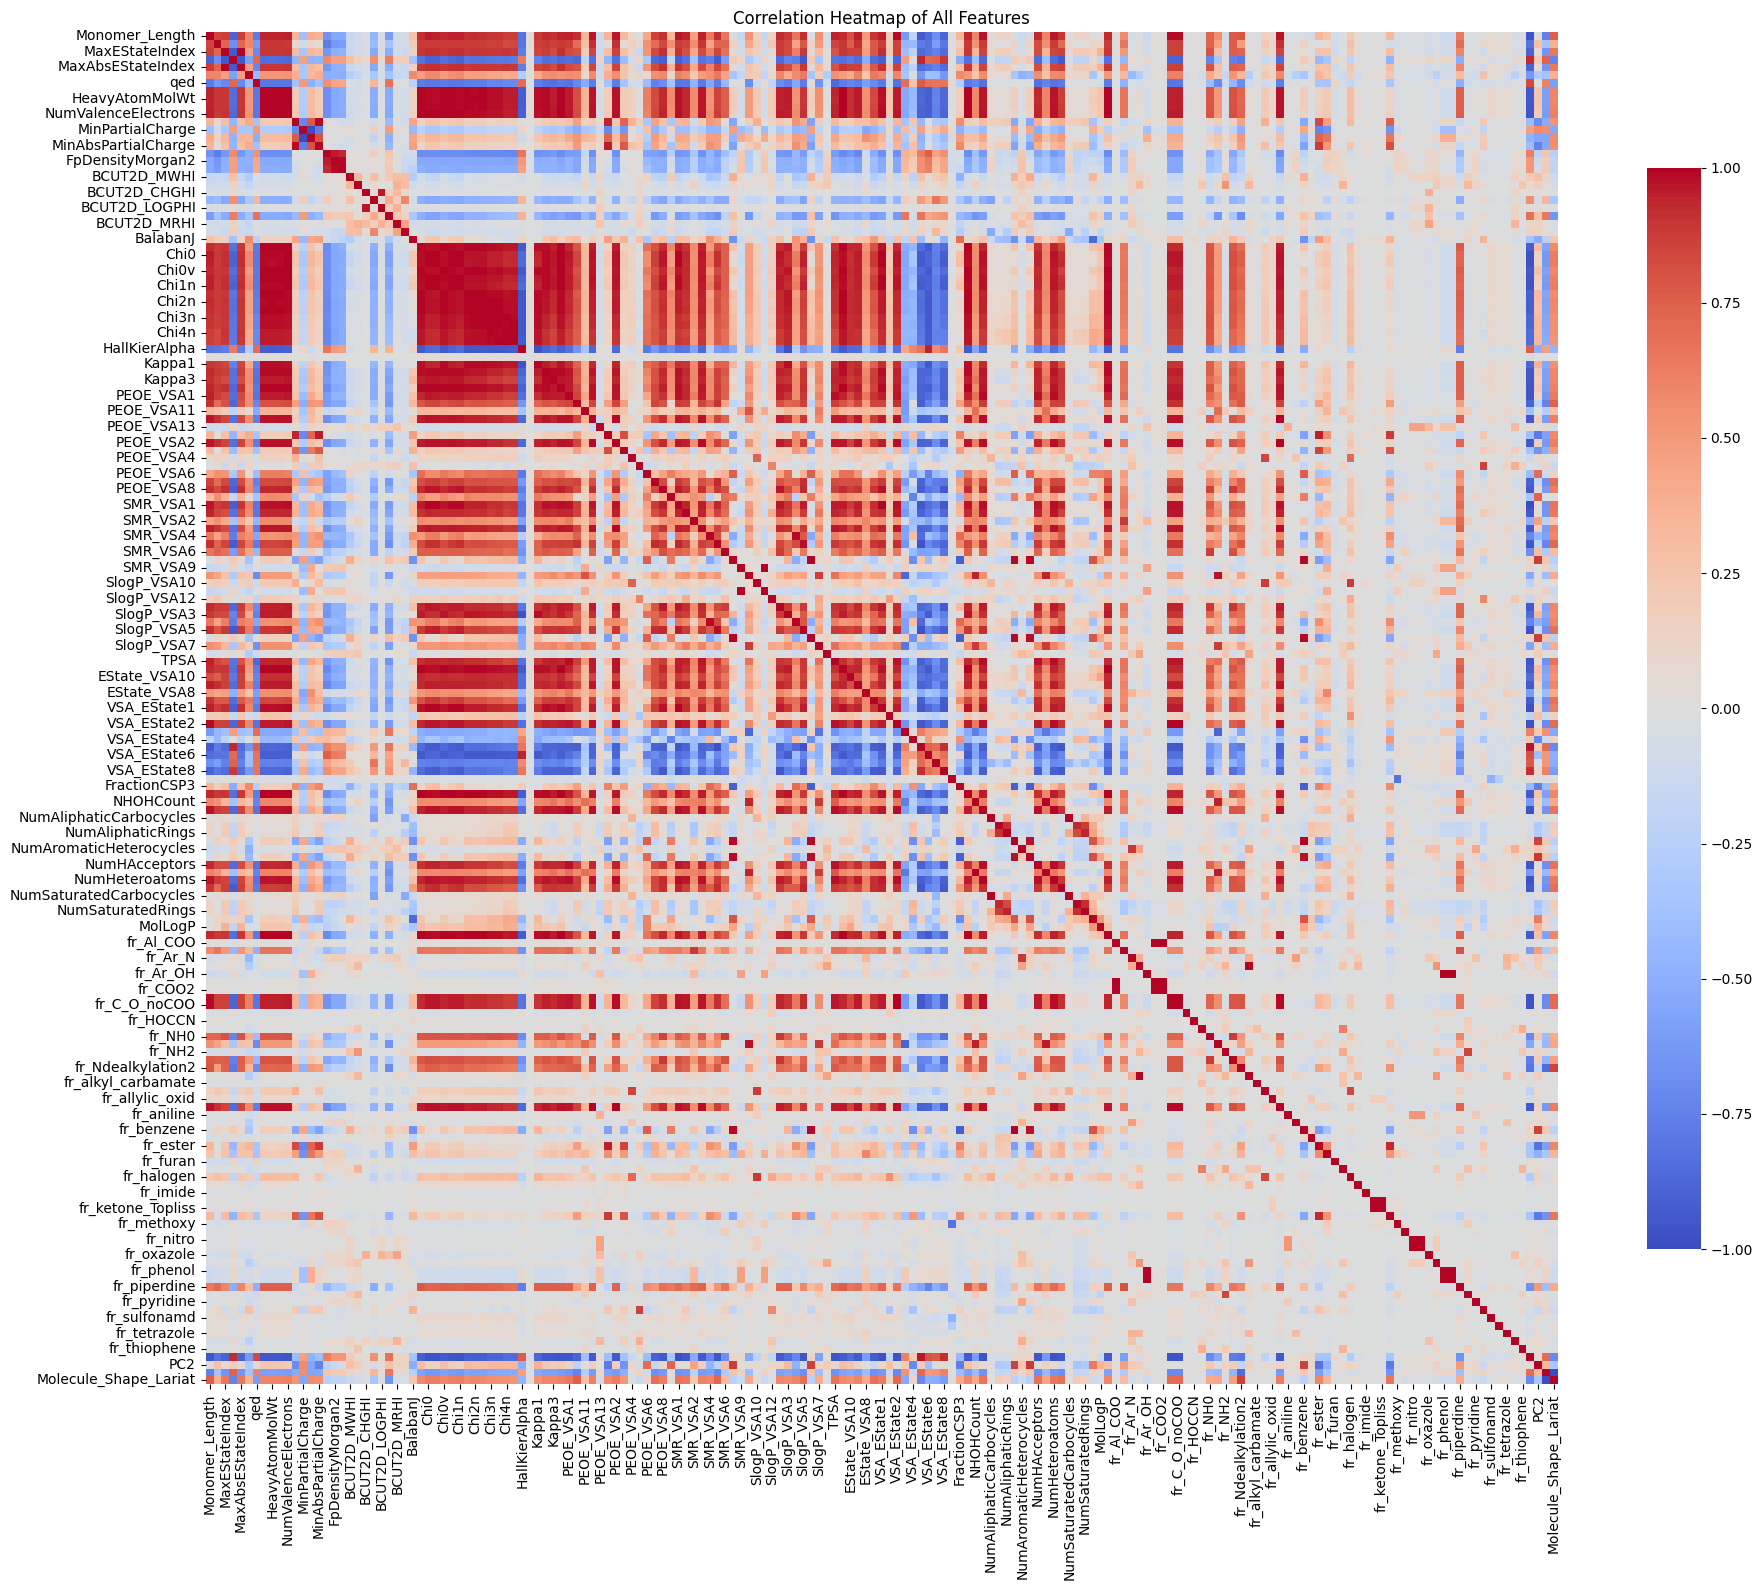

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix for all features
corr_all = features.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_all, cmap='coolwarm', center=0, annot=False, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Use all features not in final_features for this ensemble model
remaining_features = features.columns.tolist()

# Split data
X_remain_train, X_remain_test, y_remain_train, y_remain_test = train_test_split(
    features[remaining_features], target, test_size=0.2, random_state=42
)

# Ensemble averaging: train several RFs on different seeds and average predictions
n_ensemble = 10
ensemble_remain_preds = []

for seed in range(n_ensemble):
    ensemble_pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor(random_state=seed, n_jobs=-1))
    ])
    ensemble_pipeline.fit(X_remain_train, y_remain_train)
    preds = ensemble_pipeline.predict(X_remain_test)
    ensemble_remain_preds.append(preds)

# Average predictions
y_remain_pred = np.mean(ensemble_remain_preds, axis=0)

In [14]:
importances = ensemble_pipeline.named_steps['regressor'].feature_importances_
feature_names = X_remain_train.columns

# Extract only functional group features (those starting with 'fr_')
fr_mask = feature_names.str.startswith('fr_')
fr_importances = importances[fr_mask]
fr_names = feature_names[fr_mask]

# Get top 25 functional group features by importance
top_25_idx = np.argsort(fr_importances)[::-1][:25]
top_25_fr_names = fr_names[top_25_idx]
top_25_fr_importances = fr_importances[top_25_idx]

# Display results
top_25_fr = pd.DataFrame({
    'Functional Group': top_25_fr_names,
    'Importance': top_25_fr_importances
}).reset_index(drop=True)

print(top_25_fr)

          Functional Group  Importance
0              fr_priamide    0.016486
1                 fr_Al_OH    0.014685
2        fr_Ndealkylation1    0.013844
3                   fr_NH2    0.012488
4              fr_bicyclic    0.005956
5             fr_piperdine    0.004428
6                   fr_NH0    0.002209
7                  fr_Ar_N    0.002034
8               fr_halogen    0.001418
9                   fr_NH1    0.001056
10              fr_benzene    0.000565
11       fr_Ndealkylation2    0.000499
12                fr_ether    0.000450
13                fr_amide    0.000447
14   fr_para_hydroxylation    0.000441
15                  fr_C_O    0.000260
16              fr_methoxy    0.000250
17                fr_HOCCN    0.000221
18                fr_Ar_OH    0.000190
19               fr_phenol    0.000180
20  fr_phenol_noOrthoHbond    0.000127
21             fr_pyridine    0.000107
22                fr_Ar_NH    0.000106
23            fr_C_O_noCOO    0.000104
24         fr_allylic_oxi

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assume 'features' is your input DataFrame containing all original descriptors

# Select the desired handpicked features for the final dataset
final_feature_names = [
    # Molecular size & weight
    'MolWt', 'ExactMolWt', 'HeavyAtomCount',
    # Lipophilicity
    'MolLogP',
    # Polarity / hydrogen-bonding
    'TPSA', 'NumHDonors', 'NumHAcceptors',
    # Flexibility / shape
    'NumRotatableBonds', 'RingCount', 'NumAromaticRings', 'NumAliphaticRings', 'FractionCSP3',
    # Overall drug-likeness / complexity
    'qed', 'HeavyAtomMolWt', 'NumHeteroatoms',
    # Molecule shape
    'Molecule_Shape_Circle', 'Molecule_Shape_Lariat',
    # PC1 and PC2
    'PC1', 'PC2'
]

# Utility to add PCA features
def add_pca_features(df, prefix, cols, max_components, variance_threshold=0.90, random_state=42):
    if not cols:
        return []
    data = df[cols].fillna(0)
    pca_full = PCA(n_components=min(max_components, len(cols)), random_state=random_state)
    pca_full.fit(data)
    cumvar = np.cumsum(pca_full.explained_variance_ratio_)
    n_comp = int(np.argmax(cumvar >= variance_threshold) + 1)
    pca = PCA(n_components=n_comp, random_state=random_state)
    comps = pca.fit_transform(data)
    new_cols = []
    for i in range(n_comp):
        col_name = f"{prefix}_PCA{i+1}"
        df[col_name] = comps[:, i]
        new_cols.append(col_name)
    print(f"{prefix} PCA: {n_comp} comps, {cumvar[n_comp-1]*100:.1f}% var")
    return new_cols

# Perform PCA for descriptor families and collect the new column names
new_cols = []  # Initialize list to collect PCA and aggregated feature names

# PEOE_VSA PCA
peoe_cols = [f'PEOE_VSA{i}' for i in range(1, 15) if f'PEOE_VSA{i}' in features.columns]
new_cols += add_pca_features(features, 'PEOE_VSA', peoe_cols, max_components=3)

# SMR_VSA PCA
smr_cols = [f'SMR_VSA{i}' for i in range(1, 10) if f'SMR_VSA{i}' in features.columns]
new_cols += add_pca_features(features, 'SMR_VSA', smr_cols, max_components=2)

# SlogP_VSA PCA
slogp_cols = [f'SlogP_VSA{i}' for i in range(1, 13) if f'SlogP_VSA{i}' in features.columns]
new_cols += add_pca_features(features, 'SlogP_VSA', slogp_cols, max_components=3)

# EState_VSA PCA
estate_vsa_cols = [f'EState_VSA{i}' for i in range(1, 12) if f'EState_VSA{i}' in features.columns]
new_cols += add_pca_features(features, 'EState_VSA', estate_vsa_cols, max_components=3)

# VSA_EState PCA
vsa_estate_cols = [f'VSA_EState{i}' for i in range(1, 11) if f'VSA_EState{i}' in features.columns]
new_cols += add_pca_features(features, 'VSA_EState', vsa_estate_cols, max_components=3)

# BCUT2D PCA
bcut2d_cols = [col for col in features.columns if col.startswith('BCUT2D_')]
new_cols += add_pca_features(features, 'BCUT2D', bcut2d_cols, max_components=2)

# Combine all Chi features (base, n, v) into a single PCA
chi_all_cols = [col for col in features.columns if col.startswith('Chi')]
if chi_all_cols:
    # Optionally fill NaN with 0 or column mean if needed
    n_components = min(3, len(chi_all_cols))
    new_cols += add_pca_features(features, 'ChiALL', chi_all_cols, max_components=n_components)

# Only keep the top 25 most important functional group columns based on feature importance

# List of all functional group columns in features
fr_cols = [col for col in features.columns if col.startswith('fr_')]

# Use the top 25 functional group names as a list
top_25_fr_list = top_25_fr['Functional Group'].tolist()
new_cols += top_25_fr_list

# Aggregate the rest into a single column
other_fr = [col for col in fr_cols if col not in top_25_fr]
if other_fr:
    features['fr_other'] = features[other_fr].sum(axis=1)
    new_cols.append('fr_other')

# Combine all features
final_features = final_feature_names + new_cols

print(f"Total features in final_features: {len(final_features)}")
print(final_features)

PEOE_VSA PCA: 2 comps, 90.6% var
SMR_VSA PCA: 2 comps, 95.4% var
SlogP_VSA PCA: 2 comps, 95.5% var
EState_VSA PCA: 1 comps, 98.2% var
VSA_EState PCA: 1 comps, 98.5% var
BCUT2D PCA: 1 comps, 99.9% var
ChiALL PCA: 1 comps, 99.8% var
Total features in final_features: 55
['MolWt', 'ExactMolWt', 'HeavyAtomCount', 'MolLogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds', 'RingCount', 'NumAromaticRings', 'NumAliphaticRings', 'FractionCSP3', 'qed', 'HeavyAtomMolWt', 'NumHeteroatoms', 'Molecule_Shape_Circle', 'Molecule_Shape_Lariat', 'PC1', 'PC2', 'PEOE_VSA_PCA1', 'PEOE_VSA_PCA2', 'SMR_VSA_PCA1', 'SMR_VSA_PCA2', 'SlogP_VSA_PCA1', 'SlogP_VSA_PCA2', 'EState_VSA_PCA1', 'VSA_EState_PCA1', 'BCUT2D_PCA1', 'ChiALL_PCA1', 'fr_priamide', 'fr_Al_OH', 'fr_Ndealkylation1', 'fr_NH2', 'fr_bicyclic', 'fr_piperdine', 'fr_NH0', 'fr_Ar_N', 'fr_halogen', 'fr_NH1', 'fr_benzene', 'fr_Ndealkylation2', 'fr_ether', 'fr_amide', 'fr_para_hydroxylation', 'fr_C_O', 'fr_methoxy', 'fr_HOCCN', 'fr_Ar_OH', 'fr_ph

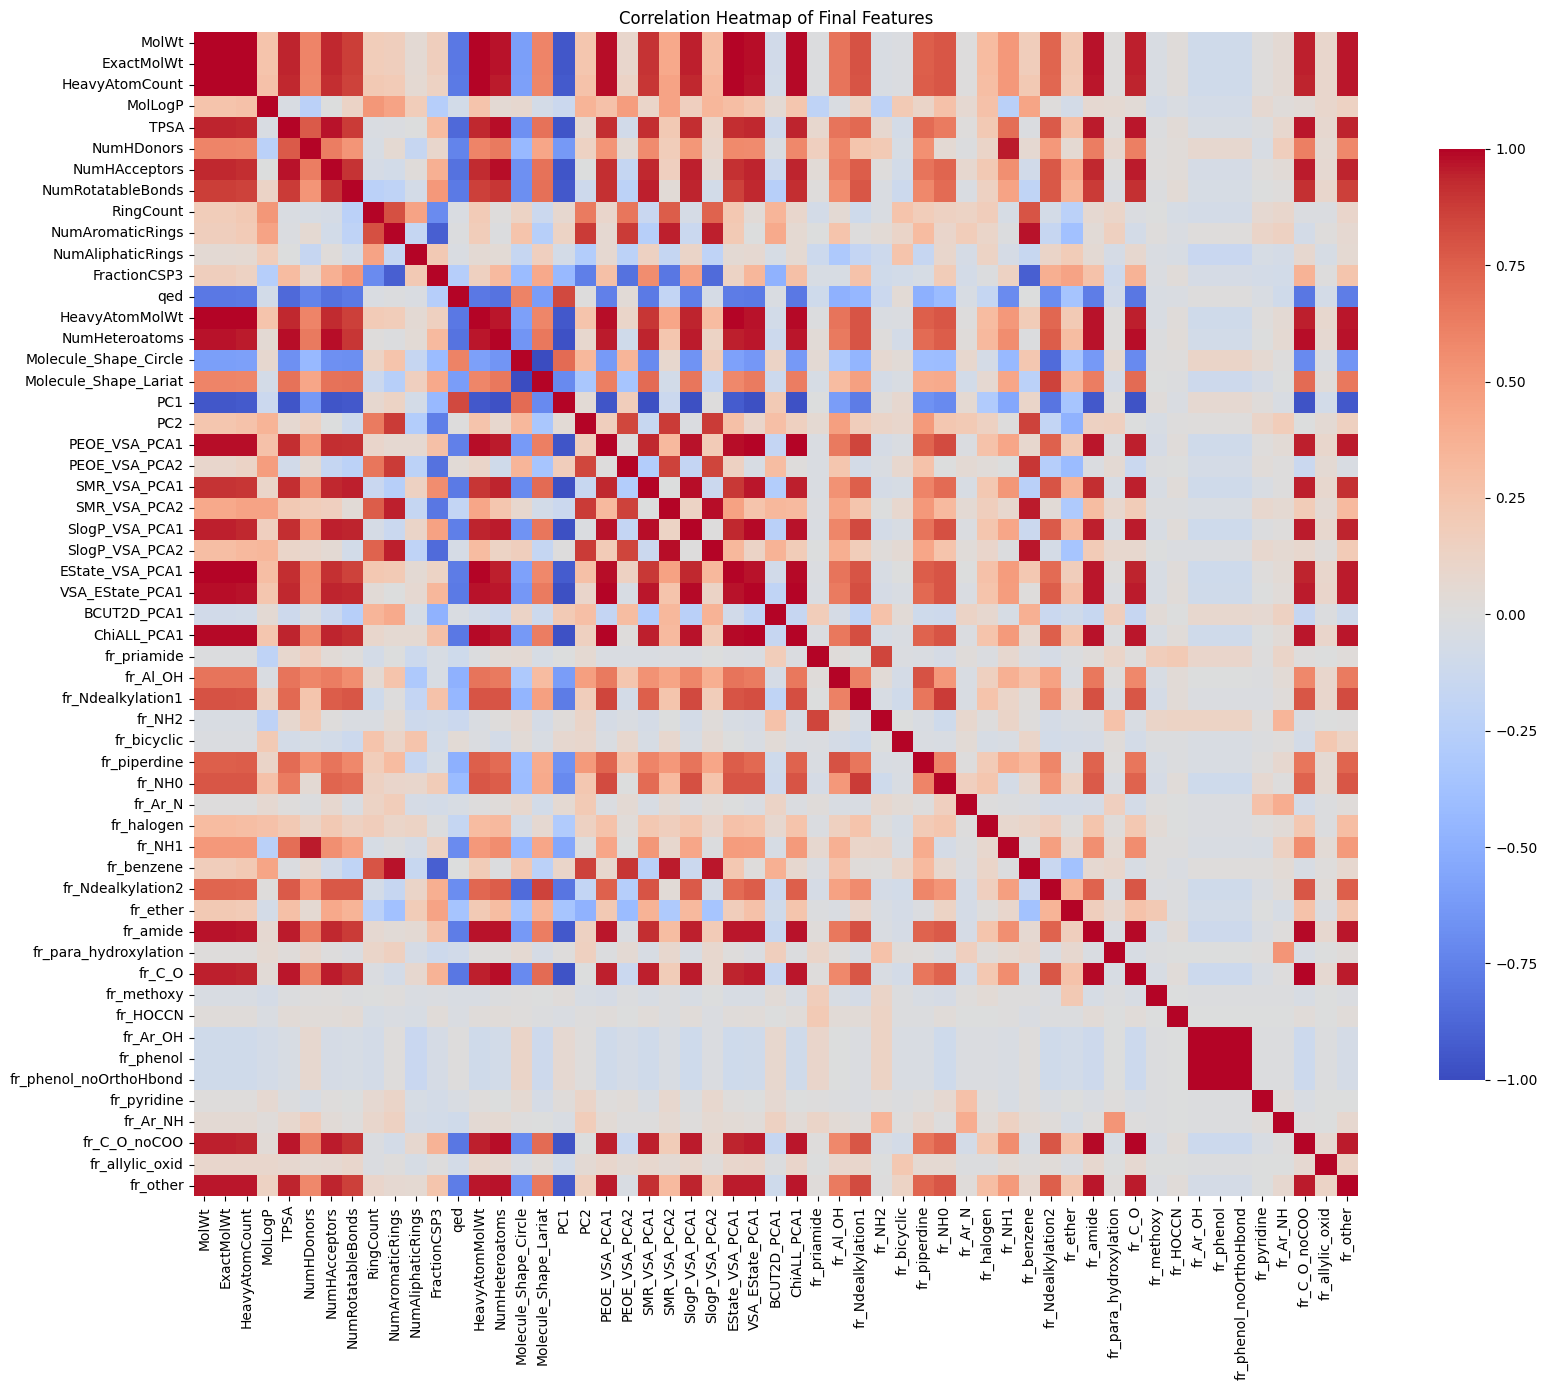

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix for the final features
corr = features[final_features].corr()

plt.figure(figsize=(18, 14))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Final Features")
plt.tight_layout()
plt.show()

# Training the Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Define pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

pipeline = Pipeline([
	('scaler', StandardScaler()),
	('regressor', RandomForestRegressor(n_jobs=-1))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(features[final_features], target, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict
# Ensemble averaging: train several RFs on different seeds and average predictions
n_ensemble = 10
ensemble_preds = []

for seed in range(n_ensemble):
	# New pipeline with different random_state
	ensemble_pipeline = Pipeline([
		('scaler', StandardScaler()),
		('regressor', RandomForestRegressor(random_state=seed, n_jobs=-1))
	])
	# Fit on the same training split
	ensemble_pipeline.fit(X_train, y_train)
	# Predict on test set
	preds = ensemble_pipeline.predict(X_test)
	ensemble_preds.append(preds)

# Average predictions
y_pred = np.mean(ensemble_preds, axis=0)


In [18]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Predict on training set
y_train_pred = pipeline.predict(X_train)

# Calculate metrics for training set
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = (abs((y_train - y_train_pred) / y_train).mean()) * 100
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test set
y_test_pred = pipeline.predict(X_test)

# Calculate metrics for test set
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mape = (abs((y_test - y_test_pred) / y_test).mean()) * 100
r2 = r2_score(y_test, y_test_pred)

print("Training set performance:")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"MAPE: {train_mape:.2f}%")
print(f"R2: {train_r2:.4f}")

print("\nTest set performance:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"R2: {r2:.4f}")

Training set performance:
RMSE: 0.3434
MAE: 0.2439
MAPE: 4.17%
R2: 0.8077

Test set performance:
RMSE: 0.4949
MAE: 0.3585
MAPE: 6.15%
R2: 0.6155
